In [1]:
import numpy as np
import pandas as pd
import scipy.stats as sts
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('auto.csv')
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,164,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,164,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,164,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [ ]:
sns.pairplot(df[['wheel-base', 'bore', 'compression-ratio', 'horsepower']])

In [3]:
bore = df['bore']

In [ ]:
bore.sample(100, replace=True)

In [ ]:
sns.pairplot(df, vars=[['wheel-base', 'bore', 'compression-ratio', 'horsepower']])

In [15]:
import pandas_profiling
df.profile_report


c:\python\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  """Entry point for launching an IPython kernel.


In [ ]:
df.profile_report()

In [10]:
mean = bore.mean()
std = bore.std()

In [13]:
sts.shapiro(bore)

ShapiroResult(statistic=0.9629282355308533, pvalue=3.3093678212026134e-05)

In [ ]:
sts.chisquare()

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [ ]:
fg = sns.PairGrid(df, col='drive-wheels')
fg.map(sns.scatterplot, 'engine-size', 'price')

In [3]:
asp = df['aspiration']
ft = df['fuel-type']

In [4]:
crt = pd.crosstab(asp, ft)
crt

fuel-type,diesel,gas
aspiration,,
std,7,161
turbo,13,24


In [ ]:
sts.chi2_contingency(crt)

In [6]:
sts.fisher_exact(crt)

(0.0802675585284281, 9.359428164416866e-07)

fuel-type,diesel,gas,asp_code
aspiration,,,
std,7,161,0
turbo,13,24,1
ft_code,0,1,2


In [ ]:
pd.Series([0, 1, 2], index=crt.columns)

In [151]:
x = [0, 2, 0, 2]
y = [0, 0, 2, 2]
z = np.zeros(4)


In [154]:
crt_ar = crt.to_numpy()
dz = [crt_ar[0, 0], crt_ar[1, 0], crt_ar[0, 1], crt_ar[1, 1]]
dz

In [155]:
dz = [crt_ar[0, 0], crt_ar[1, 0], crt_ar[0, 1], crt_ar[1, 1]]
dz

[7, 13, 161, 24]

In [111]:
crt

fuel-type,diesel,gas,asp_code
aspiration,,,
std,7,161,std
turbo,13,24,turbo


[Text(0.5, 0, 'diesel'), Text(2.5, 0, 'gas')]

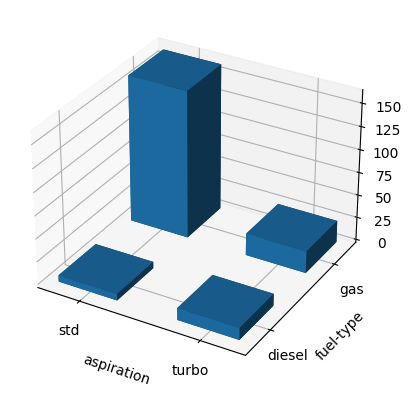

In [162]:
fig = plt.figure()
ax = plt.axes(projection = "3d")
ax.bar3d(x, y, z, 1, 1, dz)
ax.set_xlabel(crt.index.name)
ax.set_ylabel(crt.columns.name)
ax.set_xticks([0.5, 2.5])
ax.set_xticklabels(crt.index)
ax.set_yticks([0.5, 2.5])
ax.set_yticklabels(crt.columns)

<AxesSubplot:xlabel='fuel-type', ylabel='aspiration'>

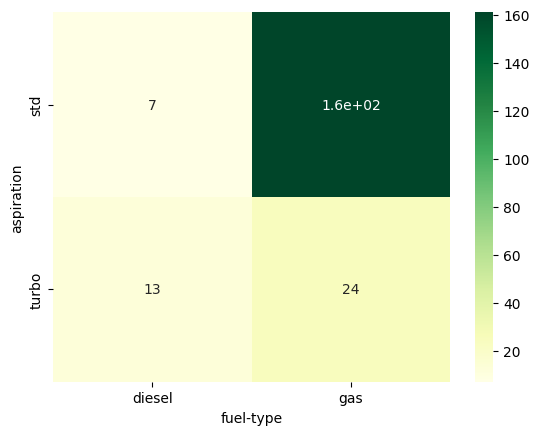

In [73]:
sns.heatmap(crt, cmap='YlGn', annot=True)

In [60]:
from statsmodels.graphics.mosaicplot import mosaic

In [ ]:
props = lambda key: {'color': 'red' if 'std' in key else 'greeen'}
mosaic(df, index=['aspiration', 'fuel-type'], properties=props)
pass

In [ ]:
sns.FacetGrid(df, col =['aspiration', 'fuel-type'])

In [ ]:
sts.chi2_contingency()

In [37]:
gas = df[df['fuel-type'] == 'gas']['engine-size']
diesel = df[df['fuel-type'] == 'diesel']['engine-size']

In [39]:
sts.mannwhitneyu(gas, diesel)

MannwhitneyuResult(statistic=1374.5, pvalue=0.059163899854358784)

In [12]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,126.365854,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.324878,3.253366,10.142537,106.048780,5131.463415,25.219512,30.751220,13312.712195
std,1.245307,35.438400,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.273049,0.313937,3.972040,43.468803,480.933330,6.542142,6.886443,8102.472461
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,101.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.130000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,122.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,150.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,120.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,256.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [ ]:
sns.pairplot(df)

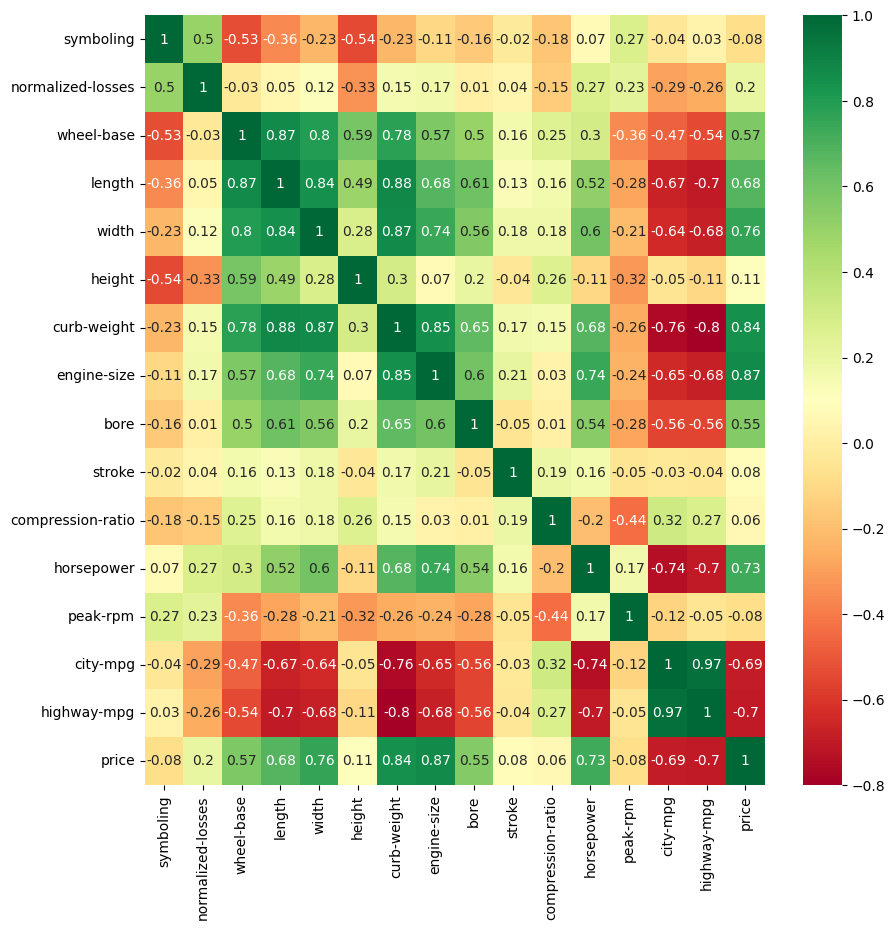

In [19]:
sns.heatmap(np.round(df.corr(), decimals=2), cmap='RdYlGn', annot=True)
fig = plt.gcf()
fig.set_size_inches(10,10)

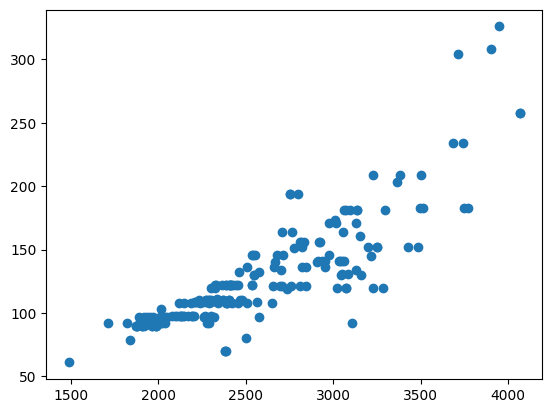

In [22]:
plt.scatter(df['curb-weight'], df['engine-size'])

<AxesSubplot:xlabel='price', ylabel='Count'>

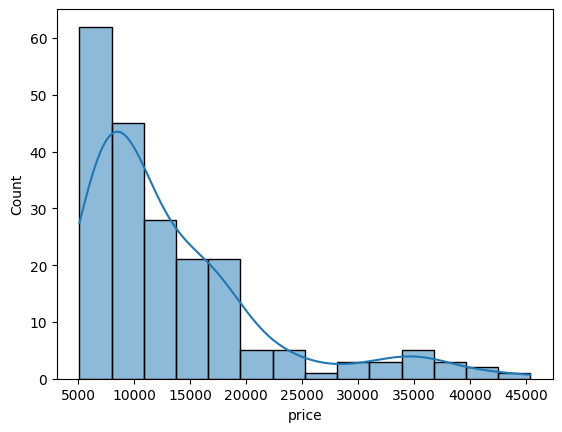

In [29]:
price = df['price']
sns.histplot(price, kde=True)

In [25]:
price.skew()

1.7663998888191028

In [26]:
price.kurtosis()

2.948637293212561